Inspiration for the notebook: [How to Learn Probability Distribution](https://youtu.be/mBCiKUzwdMs?si=BvSvCTJhtXG7xeTA) by Mutual Information

Let us take a sample of Bernoulli distributed random variable $H$. 

Let's define $\mathbb{P}(X = H) = 0.3$

Let us define the random variable $T$, where $\mathbb{P}(X = T) = 0.7$

Thus, the random variables $H$ and $T$ are "complementary" to each other.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### Discrete Distributions

Let us generate a sample of 1000 data points.

In [20]:
sample = np.random.choice(["H", "T"], size=1000, p=[0.3, 0.7])

sample[:20]

array(['T', 'T', 'T', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'T',
       'H', 'H', 'H', 'T', 'T', 'T', 'H'], dtype='<U1')

Now, let us derive a random variable by measuring the the number of $T$'s between every $H$.

In [21]:
bin = np.zeros(1000)

count = 0
total_counts = 0
for val in sample:
    if val == "T":
        count += 1
    if val == "H":
        bin[count] += 1
        total_counts += 1
        count = 0


In [22]:
probas = bin / total_counts

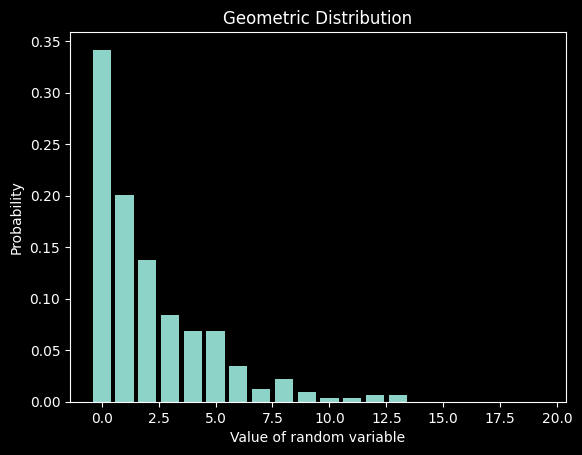

In [24]:
plt.xlabel("Value of random variable")
plt.ylabel("Probability")
plt.bar(np.arange(20), probas[:20])
plt.title("Geometric Distribution")
plt.show()

This is what we call a **Geometric distribution** with a parameter $p = 0.3$. It counts the number of events $T$ between every occurance of an event $H$ with probability 0.3 of taking place.

Now, if we start counting $T$ between every $r$-th $H$, we'll see the following probabilities. For our example, say $r = 2$. So, we count $T$'s for every 2 $H$'s.

In [33]:
bin2 = np.zeros(1000)

count = 0
total_counts = 0
H_encountered_times = 0
for val in sample:
    if val == "T":
        count += 1
    if val == "H":
        if H_encountered_times == 1:
            H_encountered_times = 0
            bin2[count] += 1
            total_counts += 1
            count = 0
        else:
            # count += 1
            H_encountered_times += 1


In [34]:
probas2 = bin2 / total_counts

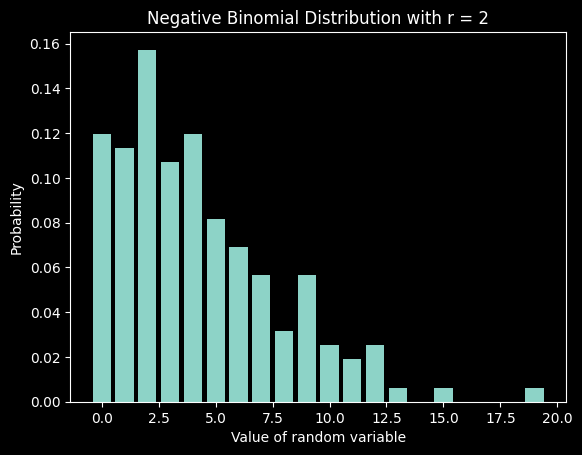

In [35]:
plt.xlabel("Value of random variable")
plt.ylabel("Probability")
plt.bar(np.arange(20), probas2[:20])
plt.title("Negative Binomial Distribution with r = 2")
plt.show()

Now, what we have is a **Negative Binomial Distribution** with paramters $p = 0.3$ and $r = 2$.

For our next experiment, let's derive a random variable where we count the number of $H$'s in a block of $N$ boxes. 

Say, $N = 6$.

In [51]:
bin3 = np.zeros(1000)

count = 0
N = 6
total_counts = 0
points_encountered = 0
for val in sample:
    if val == "H":
        count += 1
    if points_encountered == N:
        bin3[count] += 1
        total_counts += 1
        count = 0
        points_encountered = 0
    else:
        points_encountered += 1


In [52]:
probas3 = bin3 / total_counts

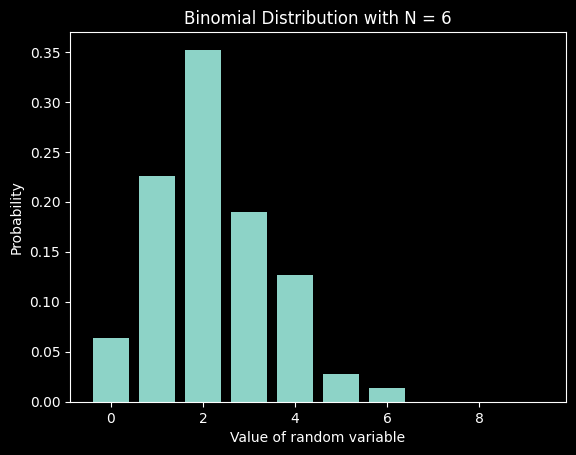

In [54]:
plt.xlabel("Value of random variable")
plt.ylabel("Probability")
plt.bar(np.arange(10), probas3[:10])
plt.title("Binomial Distribution with N = 6")
plt.show()

This is what we call a **Binomial distribution** with paramters $N = 6$ and $p = 0.3$.